Este código está basado en el que se propone para ello en [Rbloggers](https://www.r-bloggers.com/2017/01/principal-component-analysis-in-r/). Su **objetivo** es mostrar cómo se emplea el análisis de componentes principales (PCA) para reducir la dimensionalidad de un conjunto de datos cuando éste presenta redundancia. Para ello, vamos a emplear el conjunto de datos publico *housing.data*. Este fichero contiene 14 variables de 504 casas de distintas zonas de Boston y alrededores (EEUU), siendo la última columna la mediana del valor de las casas en miles de dólares USA (MEDV). Trabajar con tantas variables a la hora de aplicar cualquier algoritmo es complicado y, lo que es más, si las variables están correladas, muchos algoritmos no funcionarán correctamente. Por lo tanto, nuestro objetivo es reducir la dimensión y la correlación entre variables del conjunto de datos. Comenzaremos cargando las librerías que vamos a emplear y el conjunto de datos:

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Cargar el archivo desde la URL y ajustar los nombres de las columnas
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
houses = pd.read_csv(url, sep='\s+', header=None, names=columns, na_values='?')
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


Las columnas de houses tienen el siguiente significado:
### Descripción de Variables:

1. **CRIM**: Tasa de crimen per cápita por zona.
2. **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
3. **INDUS**: Proporción de acres de negocios no minoristas por zona.
4. **CHAS**: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario).
5. **NOX**: Concentración de óxido nítrico (partes por 10 millones).
6. **RM**: Número promedio de habitaciones por vivienda.
7. **AGE**: Proporción de unidades ocupadas por el propietario construidas antes de 1940.
8. **DIS**: Distancias ponderadas a cinco centros de empleo en Boston.
9. **RAD**: Índice de accesibilidad a carreteras radiales.
10. **TAX**: Tasa de impuestos a la propiedad de valor completo por cada $10,000.
11. **PTRATIO**: Proporción alumno-maestro por zona.
12. **B**: 1000(Bk — 0.63)², donde Bk es la proporción de [personas de ascendencia afroamericana] por zona.
13. **LSTAT**: Porcentaje de población de bajo estatus.
14. **MEDV**: Valor mediano de viviendas ocupadas por el propietario en miles de dólares.

Donde la variable a predecir va a ser MEDV, es decir, el precio de la vivienda según las características de la zona en que se encuentra



A continuación, extraemos las compontentes de las variables independientes. En este caso, la variable dependiente es MEDV, por lo que la eliminamos del conjunto antes de aplicar PCA. Vamos a preescalar las variables para segurarnos de que todas contribuyan de manera equitativa al análisis, esto es restamos la media y dividimos por la varianza (esto también se puede hacer directamente con StandardScaler de sklearn.preprocessing).


In [2]:
# Aplicar PCA a todas las variables excepto la columna MEDV
X = houses.drop("MEDV", axis=1)
X_scaled = (X - X.mean()) / X.std()  # Escalar las variables

pca = PCA()  # Creo objeto pca. No fijar aun numero de componentes, es decir, 12 variables-> 12 componentes
scores_houses = pca.fit_transform(X_scaled)
#en scores esta el valor de los datos rotados, esto es, la proyeccion de los originales sobre los nuevos ejes (componentes)

# Ver los resultados de PCA
print("Componentes Principales (PCA):")
print(pd.DataFrame(pca.components_, columns=X.columns)) #loadings o relación entre las variables originales y los componentes principales



Componentes Principales (PCA):
        CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   0.250951 -0.256315  0.346672  0.005042  0.342852 -0.189243  0.313671   
1  -0.315252 -0.323313  0.112493  0.454829  0.219116  0.149332  0.311978   
2   0.246566  0.295858 -0.015946  0.289781  0.120964  0.593961 -0.017675   
3   0.061771  0.128712  0.017146  0.815941 -0.128226 -0.280592 -0.175206   
4   0.082157  0.320617 -0.007811  0.086531  0.136854 -0.423447  0.016691   
5  -0.219660 -0.323388 -0.076138  0.167490 -0.152983  0.059267 -0.071709   
6   0.777607 -0.274996 -0.339576  0.074136 -0.199635  0.063940  0.116011   
7   0.153350 -0.402680  0.173932 -0.024662  0.080121 -0.326752 -0.600823   
8   0.260390  0.358137  0.644416 -0.013728 -0.018522  0.047898 -0.067562   
9   0.019369  0.267527 -0.363532 -0.006182  0.231056 -0.431420  0.362779   
10 -0.109644  0.262756 -0.303169  0.013927  0.111319  0.053162 -0.459159   
11  0.086761 -0.071425 -0.113200 -0.003983  0.804323  0.1

Para intentar ver qué margen de reducción es razonable, podemos comprobar la varianza explicada por cada componente, ordenados desde el primero, que es el que más varianza explica, en adelante.


Varianza Explicada por Componente Principal:
[0.47129606 0.11025193 0.0955859  0.06596732 0.06421661 0.05056978
 0.04118124 0.03046902 0.02130333 0.01694137 0.0143088  0.01302331
 0.00488533]

Varianza Acumulada Explicada por cada Componente Principal Añadido:
[0.47129606 0.581548   0.67713389 0.74310121 0.80731782 0.8578876
 0.89906884 0.92953786 0.9508412  0.96778257 0.98209137 0.99511467
 1.        ]


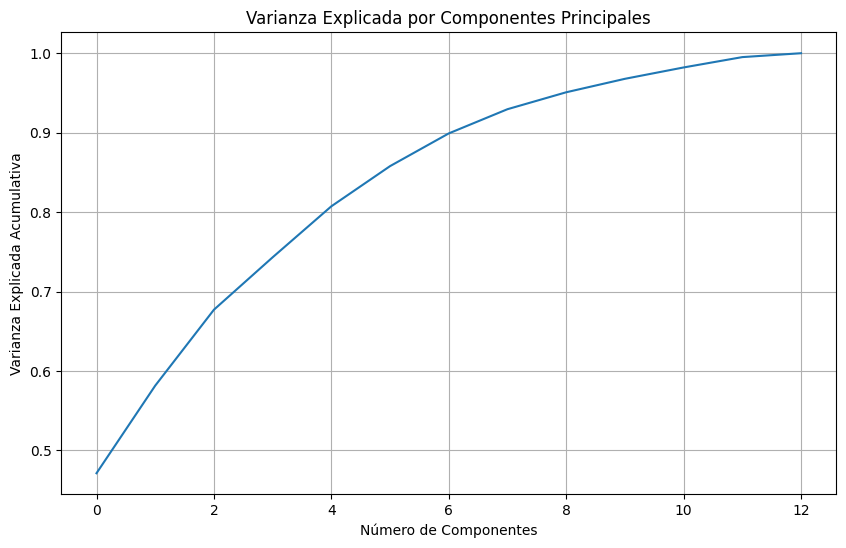

In [3]:
# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("\nVarianza Explicada por Componente Principal:")
print(explained_variance_ratio)

print("\nVarianza Acumulada Explicada por cada Componente Principal Añadido:")
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(cumulative_variance_ratio)

# Dibujar la varianza explicada acumulativa
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada por Componentes Principales')
plt.grid(True)
plt.show()


Escoger uno u otro número de componentes vieme a decirnos cuánto homogeneizamos los datos de entrada, esto es, prescindimos de parte de la varianza de los mismos. Por ejemplo, con 4 componentes explicamos el 75% de la varianza de los datos, aproximadamente. Probemos a ver el impacto que tiene esta reducción en la predicción lineal.

In [4]:
# Ajustar un modelo de regresión lineal con los componentes principales, quedandonos solo con los 4 primeros
lm = LinearRegression()
lm.fit(scores_houses[:, :4], houses["MEDV"]) #prediccion de MEDV

# Ajustar un modelo de regresión lineal con todas las variables
lm_full = LinearRegression() #usaremos este para comparar con el reducido
lm_full.fit(X_scaled, houses["MEDV"]) #aqui usamos la estructura original

# Resumen del modelo completo
print("\nResumen del Modelo de Regresión Lineal con datos reducidos:")
print("Coeficientes:", lm.coef_)
print("Intercept:", lm.intercept_)

# Resumen del modelo reducido
print("\nResumen del Modelo de Regresión Lineal con datos completos:")
print("Coeficientes:", lm_full.coef_)
print("Intercept:", lm_full.intercept_)



Resumen del Modelo de Regresión Lineal con datos reducidos:
Coeficientes: [-2.27301878  2.19491355  3.50098691 -1.08068383]
Intercept: 22.532806324110677

Resumen del Modelo de Regresión Lineal con datos completos:
Coeficientes: [-0.92906457  1.08263896  0.14103943  0.68241438 -2.05875361  2.67687661
  0.01948534 -3.10711605  2.6648522  -2.07883689 -2.06264585  0.85010886
 -3.74733185]
Intercept: 22.532806324110673


Ahora veamos la bondad de esos modelos para compararlos. Hay varias formas. Por ejemplo, podemos predecir el valor de MEDV (la variable dependiente) para nuestros datos usando el modelo con datos completos y con datos reducidos y comprobar el Coeficiente de Determinación, que indica entre 0 y 1 cómo de ben explica el modelo la variabilidad de la variable dependiente. Se observará que se pierde algo al usar números más bajos de componentes, como cabía esperar, aunque también se observará que la predicción lineal no obtiene un valor muy alto ni siquiera usando los datos sin reducir.

In [ ]:
#prediccion con el modelo con datos reducidos
predictions = lm.predict(scores_houses[:, :4])

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(houses["MEDV"], predictions)
print("R^2 Score (reduced data->4):", r2)

#prediccion con el modelo con datos reducidos, pero ahora con 6 componentes
lm2 = LinearRegression()
lm2.fit(scores_houses[:, :8], houses["MEDV"]) #prediccion de MEDV
predictions2 = lm2.predict(scores_houses[:, :8])

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(houses["MEDV"], predictions2)
print("R^2 Score (reduced data->8):", r2)

#prediccion con el modelo con datos completos
predictions_full = lm_full.predict(X_scaled)

# Calcular el coeficiente de determinación (R²)
r2_full = r2_score(houses["MEDV"], predictions_full)
print("R^2 Score (full data):", r2_full)

R^2 Score (reduced data->4): 0.6477642937695745
R^2 Score (reduced data->6): 0.7055977712036576
R^2 Score (full data): 0.7406426641094095


Alternativamente, podemos evaluar visualmente el ajuste y calcular el error cuadrático medio del mismo, por ejemplo con el siguiente código. Observese que al final se trata de buscar un compromiso entre trabajar con un volumen de datos elevado y reducir significativamente el error de predicción.

MSE del modelo de PCA: 29.73558198232604
MSE del modelo completo: 21.894831181729202


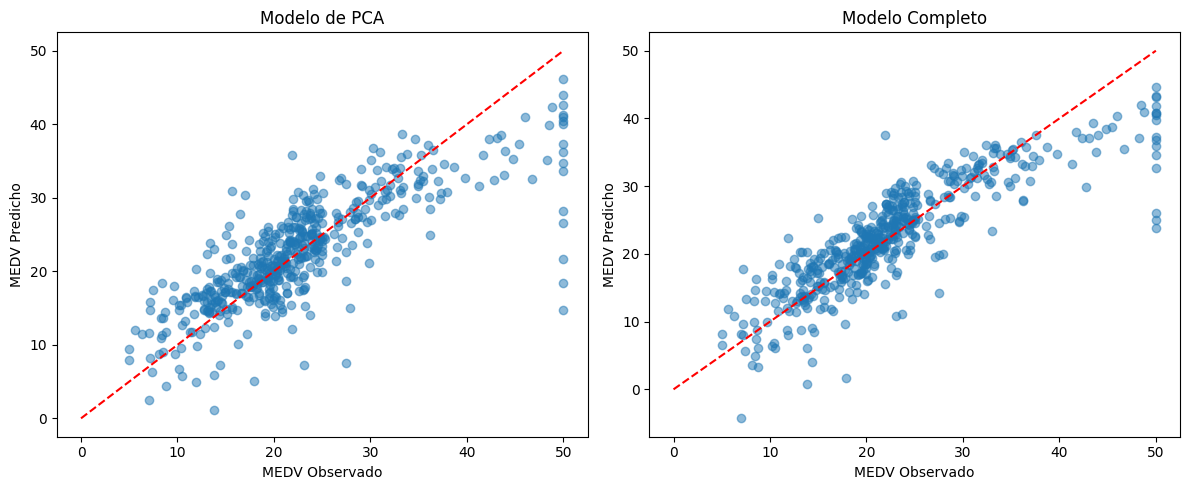

In [ ]:
# Calcular el MSE para el modelo de PCA
mse_pca = mean_squared_error(houses["MEDV"], lm.predict(scores_houses[:, :4]))

# Calcular el MSE para el modelo completo
mse_full = mean_squared_error(houses["MEDV"], lm_full.predict(X_scaled))

print("MSE del modelo de PCA:", mse_pca)
print("MSE del modelo completo:", mse_full)


# Comparar las observaciones vs. predicciones para el modelo de PCA
plt.figure(figsize=(12, 5))

# Predicciones del modelo de PCA
plt.subplot(1, 2, 1)
plt.scatter(houses["MEDV"], lm.predict(scores_houses[:, :4]), alpha=0.5)
plt.plot([0, 50], [0, 50], color='red', linestyle='--')
plt.xlabel("MEDV Observado")
plt.ylabel("MEDV Predicho")
plt.title("Modelo de PCA")


# Comparar las observaciones vs. predicciones para el modelo completo
plt.subplot(1, 2, 2)
plt.scatter(houses["MEDV"], lm_full.predict(X_scaled), alpha=0.5)
plt.plot([0, 50], [0, 50], color='red', linestyle='--')
plt.xlabel("MEDV Observado")
plt.ylabel("MEDV Predicho")
plt.title("Modelo Completo")

plt.tight_layout()
plt.show()